In [1]:
import numpy as np
import gvar as gv
import sys
import matplotlib.pyplot as plt
#matplotlib.rcParams['figure.figsize'] = [10, 8]

#import warnings  

#warnings.simplefilter(action="default")

sys.path.append('../')
import fitter.data_loader as dl
import fitter.fit_manager as fm
import fitter.fitter as fit

In [2]:
from importlib import reload
reload(dl)
reload(fm)
reload(fit)

<module 'fitter.fitter' from '/mnt/storage/research/project_scale_setting_mdwf_hisq/notebooks/../fitter/fitter.py'>

In [3]:
prior = {}
prior['w0'] = gv.BufferDict()

# const
prior['w0']['c0'] = gv.gvar('1(1)')

# lo
prior['w0']['A_l'] = gv.gvar('1(1)')
prior['w0']['A_s'] = gv.gvar('1(1)')
prior['w0']['A_a'] = gv.gvar('-0.5(2.0)')

# nlo
prior['w0']['A_aa'] = gv.gvar('0(1)')
prior['w0']['A_al'] = gv.gvar('0(1)')
prior['w0']['A_as'] = gv.gvar('0(1)')
prior['w0']['A_ll'] = gv.gvar('0(1)')
prior['w0']['A_ss'] = gv.gvar('0(1)')
prior['w0']['A_ls'] = gv.gvar('0(1)')

# n2lo
prior['w0']['A_aaa'] = gv.gvar('0(1)')
prior['w0']['A_aal'] = gv.gvar('0(1)')
prior['w0']['A_aas'] = gv.gvar('0(1)')
prior['w0']['A_all'] = gv.gvar('0(1)')
prior['w0']['A_als'] = gv.gvar('0(1)')
prior['w0']['A_ass'] = gv.gvar('0(1)')
prior['w0']['A_lll'] = gv.gvar('0(1)')
prior['w0']['A_lls'] = gv.gvar('0(1)')
prior['w0']['A_lss'] = gv.gvar('0(1)')
prior['w0']['A_sss'] = gv.gvar('0(1)')

# alpha_S term
prior['w0']['A_alpha'] = gv.gvar('0(0.7)')

# log terms
prior['w0']['A_ll_g'] = gv.gvar('0(1)')
prior['w0']['A_lll_g']  = gv.gvar('0(1)')
prior['w0']['A_lll_gg'] = gv.gvar('0(1)')
prior['w0']['A_lls_g'] = gv.gvar('0(1)')

model_info = {}
model_info['name'] = 'test'
model_info['order']  = 'n2lo'
model_info['latt_ct'] = 'nlo'
model_info['include_log'] = True
model_info['include_log2'] = True
model_info['include_fv'] = True
model_info['include_alphas'] = True
model_info['exclude'] = ['A_aaa',]
model_info['chiral_cutoff'] = 'Fpi'
model_info['eps2a_defn'] = 't0_original'

In [4]:
data_loader = dl.data_loader('2020_12_09-improved_variable_w0orig', use_charm_reweighting=False)
gv_data = data_loader.gv_data
model_info = data_loader.get_model_info_from_name('Fpi_n2lo_variable') # #Fpi_n3lo_fv_w0impr
prior = data_loader.get_prior(model_info=model_info)
phys_point_data = data_loader.phys_point_data

{'name': '2020_12_09-improved_variable_w0orig', 'models': ['Fpi_n2lo_variable', 'Fpi_n2lo_alphas_variable', 'Fpi_n2lo_alphas_fv_variable', 'Fpi_n2lo_fv_variable', 'Fpi_n2lo_log_variable', 'Fpi_n2lo_log_alphas_variable', 'Fpi_n2lo_log_alphas_fv_variable', 'Fpi_n2lo_log_fv_variable', 'Fpi_n3lo_variable', 'Fpi_n3lo_alphas_variable', 'Fpi_n3lo_alphas_fv_variable', 'Fpi_n3lo_fv_variable', 'Fpi_n3lo_log_log2_variable', 'Fpi_n3lo_log_log2_alphas_variable', 'Fpi_n3lo_log_log2_alphas_fv_variable', 'Fpi_n3lo_log_log2_fv_variable', 'Om_n2lo_variable', 'Om_n2lo_alphas_variable', 'Om_n2lo_alphas_fv_variable', 'Om_n2lo_fv_variable', 'Om_n2lo_log_variable', 'Om_n2lo_log_alphas_variable', 'Om_n2lo_log_alphas_fv_variable', 'Om_n2lo_log_fv_variable', 'Om_n3lo_variable', 'Om_n3lo_alphas_variable', 'Om_n3lo_alphas_fv_variable', 'Om_n3lo_fv_variable', 'Om_n3lo_log_log2_variable', 'Om_n3lo_log_log2_alphas_variable', 'Om_n3lo_log_log2_alphas_fv_variable', 'Om_n3lo_log_log2_fv_variable', 'Fpi_n2lo_w0orig', 'F

In [5]:
fit_manager = fm.fit_manager(
    phys_point_data=phys_point_data, 
    fit_data=gv_data, 
    model_info=model_info,
    prior=prior, 
    simultaneous=True)
print(fit_manager)

Model: Fpi_n2lo_variable   [simultaneous]
---

w0: 0.1717(16)

  w0/a06: 2.997(12)   => a06/fm: 0.05727(67)
  w0/a09: 1.9562(56)  => a09/fm: 0.08775(97)
  w0/a12: 1.4161(30)  => a12/fm: 0.1212(13)
  w0/a15: 1.1341(14)  => a15/fm: 0.1513(15)

Error Budget:
  stat    47.7%
  disc    28.1%
  phys    17.8%
  chiral   6.4%

---

sqrt(t0): 0.1522(13)

  t0/a06^2: 6.235(27) => a06/fm: 0.06094(57)
  t0/a09^2: 2.7148(79)=> a09/fm: 0.09235(83)
  t0/a12^2: 1.4693(31)=> a12/fm: 0.1255(11)
  t0/a15^2: 0.9919(13)=> a15/fm: 0.1528(13)

Error Budget:
  stat    55.0%
  disc    26.0%
  phys    12.4%
  chiral   6.7%

---

sqrt(t0)/w0: 0.8864(37)

Error Budget:
  stat    80.5%
  disc     9.4%
  phys     6.5%
  chiral   3.6%

---

Parameters:
         w0::c0      1.024 (66)      [     1.0 (1.0) ]  
        w0::A_l       1.10 (29)      [     1.0 (1.0) ]  
        w0::A_s       1.07 (34)      [     1.0 (1.0) ]  
        w0::A_a       0.15 (31)      [     0.0 (1.2) ]  
       w0::A_aa      -0.10 (48)      [  

In [6]:
fit_manager.fit_info

{'w0': {'name': 'Fpi_n2lo_variable',
  'w0': 0.1717(16),
  'logGBF': -17667.137960807497,
  'chi2/df': 810.8625203264663,
  'Q': 0.0,
  'phys_point': {'eps2_a': 0(0),
   'a': 0(0),
   'alpha_s': 0(0),
   'L': inf(0),
   'hbarc': 197.327(0),
   'Fpi': 92.07(57),
   'mpi': 134.80(30),
   'mk': 494.20(30),
   'mO': 1672.43(32),
   'lam_chi': 1157.0(7.2)},
  'error_budget': {'disc': 0.0008655846310132903,
   'chiral': 0.00041366654487419587,
   'phys': 0.0006901265498492939,
   'stat': 0.0011278021938865817},
  'prior': BufferDict({'A_a': 0.0(1.2), 'A_aa': 0.0(1.2), 'A_al': 0.0(1.2), 'A_as': 0.0(1.2), 'A_l': 1.0(1.0), 'A_ll': 0.0(1.0), 'A_ls': 0.0(1.0), 'A_s': 1.0(1.0), 'A_ss': 0.0(1.0), 'c0': 1.0(1.0)}),
  'posterior': BufferDict({'A_a': 0.15(31), 'A_aa': -0.10(48), 'A_al': 0.49(84), 'A_as': 0.28(71), 'A_l': 1.10(29), 'A_ll': 0.67(83), 'A_ls': 0.70(75), 'A_s': 1.07(34), 'A_ss': 0.29(48), 'c0': 1.024(66)})},
 't0': {'name': 'Fpi_n2lo_variable',
  'sqrt_t0': 0.1522(13),
  'logGBF': -17667.1

In [6]:
np.sqrt(np.sum(fit_manager.error_budget['t0_w0'][k]**2 for k in fit_manager.error_budget['t0_w0']))

/tmp/ipykernel_54196/2969616895.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  np.sqrt(np.sum(fit_manager.error_budget['t0_w0'][k]**2 for k in fit_manager.error_budget['t0_w0']))


0.0037475572683216317

In [6]:
fit_manager.error_budget

{'w0': {'disc': 0.0008655846310132903,
  'chiral': 0.00041366654487419587,
  'phys': 0.0006901265498492939,
  'stat': 0.0011278021938865817},
 't0': {'disc': 0.000648922446763046,
  'chiral': 0.00032885760689451647,
  'phys': 0.000448022406946393,
  'stat': 0.0009438863339035863},
 't0_w0': {'disc': 0.0008655846310132903,
  'chiral': 0.00041366654487419587,
  'phys': 0.0006901265498492939,
  'stat': 0.0011278021938865817}}

In [19]:
0.0010396829450858805
0.0010396829450858805

0.0010399484402920168

In [39]:
'''
0.0010396829450858805
0.0010399484402920168
0.0010399484

0.0010311378664280815
0.001031310277522884

'''

'\n0.0010313103'

In [7]:
np.sqrt(np.sum([v**2 for k,v in fit_manager._get_error_budget()['w0'].items()]))

0.0010129863432059261

In [8]:
gv.sdev(fit_manager.w0)

0.001031310277522884

In [6]:
fit_manager.prior

{'w0': BufferDict({'A_a': 0.0(1.2), 'A_aa': 0.0(1.2), 'A_aaa': 0.0(1.0), 'A_aal': 0.0(1.0), 'A_aas': 0.0(1.0), 'A_al': 0.0(1.2), 'A_all': 0.0(1.0), 'A_als': 0.0(1.0), 'A_as': 0.0(1.2), 'A_ass': 0.0(1.0), 'A_l': 1.0(1.0), 'A_ll': 0.0(1.0), 'A_lll': 0.0(1.0), 'A_lls': 0.0(1.0), 'A_ls': 0.0(1.0), 'A_lss': 0.0(1.0), 'A_s': 1.0(1.0), 'A_ss': 0.0(1.0), 'A_sss': 0.0(1.0), 'c0': 1.0(1.0)}),
 't0': BufferDict({'A_a': 0.0(1.8), 'A_aa': 0.0(1.8), 'A_aaa': 0.0(1.0), 'A_aal': 0.0(1.0), 'A_aas': 0.0(1.0), 'A_al': 0.0(1.8), 'A_all': 0.0(1.0), 'A_als': 0.0(1.0), 'A_as': 0.0(1.8), 'A_ass': 0.0(1.0), 'A_l': 1.0(1.0), 'A_ll': 0.0(1.0), 'A_lll': 0.0(1.0), 'A_lls': 0.0(1.0), 'A_ls': 0.0(1.0), 'A_lss': 0.0(1.0), 'A_s': 1.0(1.0), 'A_ss': 0.0(1.0), 'A_sss': 0.0(1.0), 'c0': 1.0(1.0)})}

In [7]:
fit_manager.posterior

{'w0': BufferDict({'A_a': -0.65(30), 'A_aa': -0.47(56), 'A_aaa': -0.91(93), 'A_aal': -0.18(97), 'A_aas': 0.07(96), 'A_al': -1.26(90), 'A_all': 0.01(99), 'A_als': -0.31(98), 'A_as': 0.78(88), 'A_ass': 0.46(92), 'A_l': 0.97(30), 'A_ll': -0.32(85), 'A_lll': 0.001(995), 'A_lls': -0.08(99), 'A_ls': 0.72(87), 'A_lss': 0.45(96), 'A_s': 1.26(37), 'A_ss': -0.66(76), 'A_sss': -0.76(84), 'c0': 1.104(65)}),
 't0': BufferDict({'A_a': -0.53(37), 'A_aa': 0.04(55), 'A_aaa': 0.82(93), 'A_aal': -0.10(97), 'A_aas': -0.004(969), 'A_al': -1.5(1.1), 'A_all': -0.27(99), 'A_als': 0.08(99), 'A_as': 1.3(1.1), 'A_ass': -0.09(94), 'A_l': 1.46(30), 'A_ll': -0.23(81), 'A_lll': -0.07(99), 'A_lls': -0.06(99), 'A_ls': 0.02(85), 'A_lss': -0.07(96), 'A_s': 1.26(34), 'A_ss': -0.76(74), 'A_sss': -0.67(82), 'c0': 0.869(60)})}

In [10]:
print(fit_manager)

Model: Fpi_n3lo_fv_w0impr   [simultaneous]
---

w0: 0.1712(10)

  w0/a06: 2.997(12)   => a06/fm: 0.05714(47)
  w0/a09: 1.9562(56)  => a09/fm: 0.08754(65)
  w0/a12: 1.4161(30)  => a12/fm: 0.12093(83)
  w0/a15: 1.1341(14)  => a15/fm: 0.15099(97)

Error Budget:
  stat      75.1%
  disc      11.1%
  pp_input   8.7%
  chiral     1.6%

---

sqrt(t0): 0.14251(89)

  t0/a06^2: 6.235(27) => a06/fm: 0.05707(41)
  t0/a09^2: 2.7148(79)=> a09/fm: 0.08649(59)
  t0/a12^2: 1.4693(31)=> a12/fm: 0.11757(78)
  t0/a15^2: 0.9919(13)=> a15/fm: 0.14309(92)

Error Budget:
  stat      54.3%
  pp_input   7.2%
  disc       4.9%
  chiral     0.9%

---

Parameters:
         w0::c0      1.104 (65)      [     1.0 (1.0) ]  
        w0::A_l       0.97 (30)      [     1.0 (1.0) ]  
        w0::A_s       1.26 (37)      [     1.0 (1.0) ]  
        w0::A_a      -0.65 (30)      [     0.0 (1.2) ]  
       w0::A_aa      -0.47 (56)      [     0.0 (1.2) ]  
       w0::A_al      -1.26 (90)      [     0.0 (1.2) ]  *
       w0::A

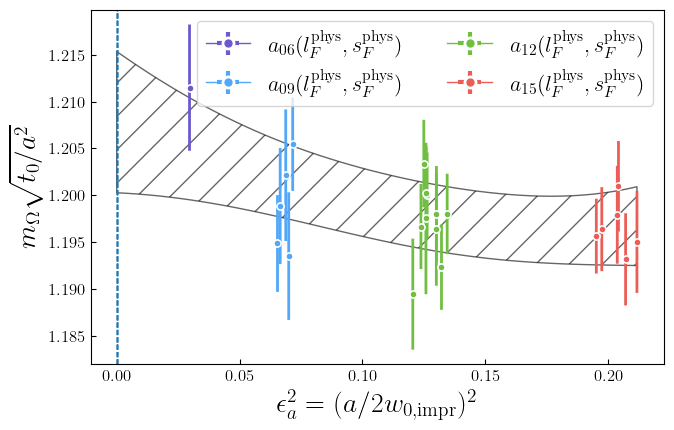

In [11]:
fit_manager.plot_fit('a', observable='t0')


In [14]:
print(fit_manager._get_error_budget(verbose=True, percent=True))

observable: w0
Partial % Errors:
                     w0
-----------------------
  A_a [disc]:0.0141337385
 A_aa [disc]:0.1390174375
 A_al [disc]:0.0537797664
 A_as [disc]:0.0909519786
A_aaa [disc]:0.0480329571
A_aal [disc]:0.0268818740
A_aas [disc]:0.0664691127
A_all [disc]:0.0008712830
A_als [disc]:0.0084883321
A_ass [disc]:0.0463142626
    c0 [xpt]:0.0039969453
   A_l [xpt]:0.0029731573
   A_s [xpt]:0.0094146765
  A_ll [xpt]:0.0111329541
  A_ls [xpt]:0.0550505859
  A_ss [xpt]:0.0248040806
 A_lll [xpt]:0.0019638779
 A_lls [xpt]:0.0020088451
 A_lss [xpt]:0.0313609633
 A_sss [xpt]:0.0325413011
 eps2_a [pp]:0.0000000000
      a [pp]:0.0000000000
alpha_s [pp]:0.0000000000
      L [pp]:0.0000000000
  hbarc [pp]:0.0000000000
    Fpi [pp]:0.1753215013
    mpi [pp]:0.0030616346
     mk [pp]:0.0163557315
     mO [pp]:0.0191338352
    x [stat]:0.5133387230
    y [stat]:0.5217720349
-----------------------
       total:0.6022374072

---
observable: t0
Partial % Errors:
                     t0
-

/mnt/storage/research/project_scale_setting_mdwf_hisq/notebooks/../fitter/fit_manager.py:148: UserWarning: x [stat] and y [stat] double count errors
  output += 'observable: ' + observable + '\n' + gv.fmt_errorbudget(outputs={'w0' : self.w0}, inputs=inputs, **kwargs) + '\n---\n'
/mnt/storage/research/project_scale_setting_mdwf_hisq/notebooks/../fitter/fit_manager.py:148: UserWarning: w0 partial error 0.001341235688349047  !=  total error 0.001031310277522884
  output += 'observable: ' + observable + '\n' + gv.fmt_errorbudget(outputs={'w0' : self.w0}, inputs=inputs, **kwargs) + '\n---\n'
/mnt/storage/research/project_scale_setting_mdwf_hisq/notebooks/../fitter/fit_manager.py:150: UserWarning: x [stat] and y [stat] double count errors
  output += 'observable: ' + observable + '\n' + gv.fmt_errorbudget(outputs={'t0' : self.sqrt_t0}, inputs=inputs, **kwargs) + '\n---\n'
/mnt/storage/research/project_scale_setting_mdwf_hisq/notebooks/../fitter/fit_manager.py:150: UserWarning: t0 partial err

In [ ]:
#fitter = fit_manager.fitter['t0']
#fitter._make_models(interpolation=True)[0].observable

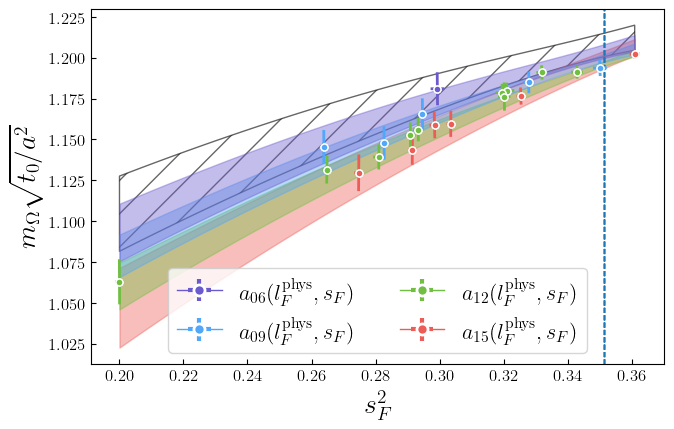

In [15]:
fit_manager.plot_fit('s', observable='t0')

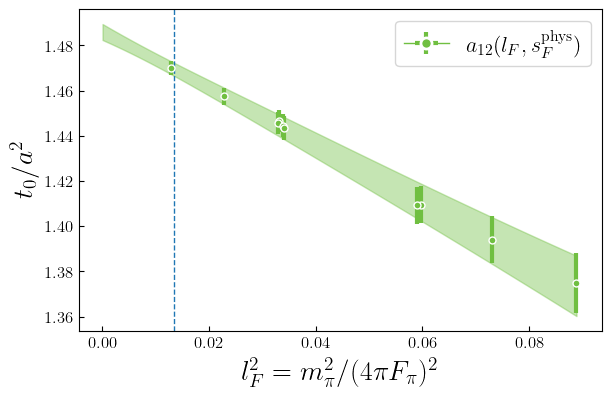

In [ ]:
fit_manager.plot_interpolation(latt_spacing='a12', observable='t0')

In [16]:
print(fit_manager.fitter['t0'].fit_interpolation())

Least Square Fit:
  chi2/dof [dof] = 0.87 [44]    Q = 0.71    logGBF = 132.05

Parameters:
      w0::c0a06       2.96 (21)      [     3.0 (1.0) ]  
      w0::c0a09       1.72 (11)      [     2.0 (1.0) ]  
      w0::c0a12       0.91 (13)      [     1.5 (1.0) ]  
      w0::c0a15       0.55 (24)      [     1.0 (1.0) ]  
       w0::k_ss      -1.6 (1.2)      [     0.0 (2.0) ]  
       w0::k_al      -0.17 (86)      [     0.0 (2.0) ]  
        w0::k_a       2.33 (33)      [     2.0 (2.0) ]  
       w0::k_as       0.27 (68)      [     0.0 (2.0) ]  
       w0::k_ls      -0.4 (1.6)      [     0.0 (2.0) ]  
        w0::k_s       0.45 (57)      [     0.0 (2.0) ]  
       w0::k_ll       0.7 (1.7)      [     0.0 (2.0) ]  
     w0::k_ll_g       0.3 (1.4)      [     0.0 (2.0) ]  
       w0::k_aa      -1.3 (1.5)      [     0.0 (2.0) ]  
        w0::k_l      -1.14 (74)      [     0.0 (2.0) ]  
      t0::c0a06       6.32 (44)      [     6.0 (1.0) ]  
      t0::c0a09       2.46 (29)      [     3.0 (1.0) ]

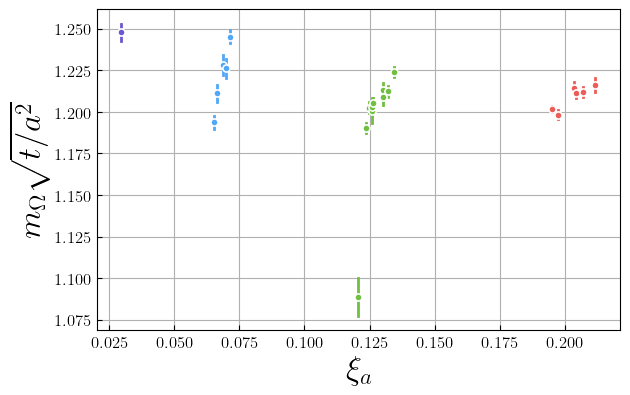

In [17]:
fit_manager.plot_parameters(xparam='a', yparam='t0')

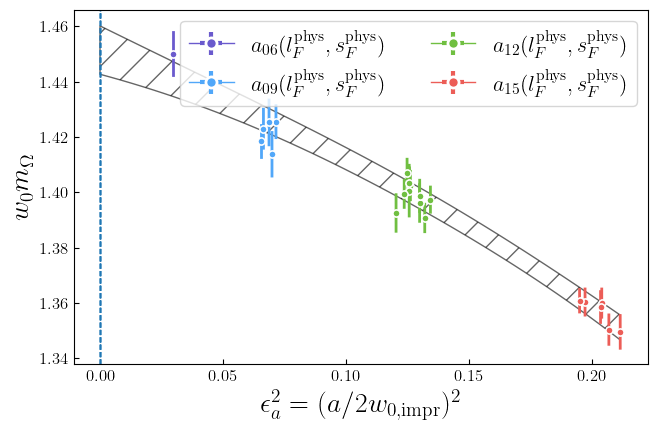

In [ ]:
fit_manager.plot_fit('a', observable='w0')

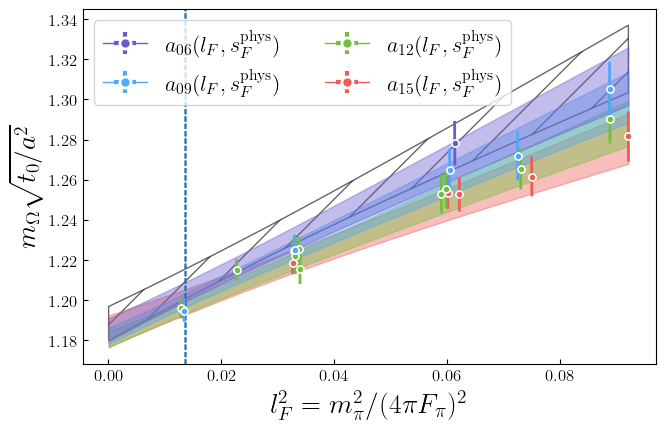

In [ ]:
fit_manager.plot_fit('l', observable='t0')

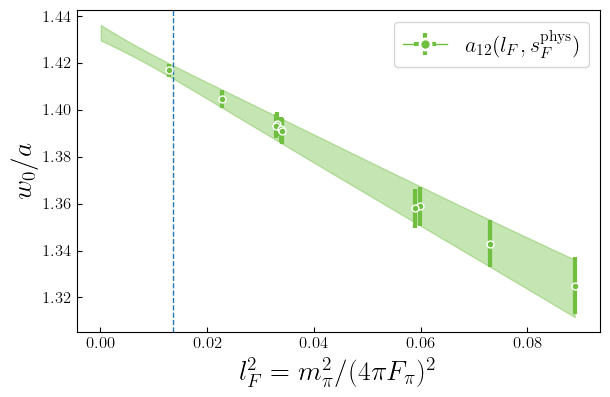

In [ ]:
fit_manager.plot_interpolation('a12', observable='w0')

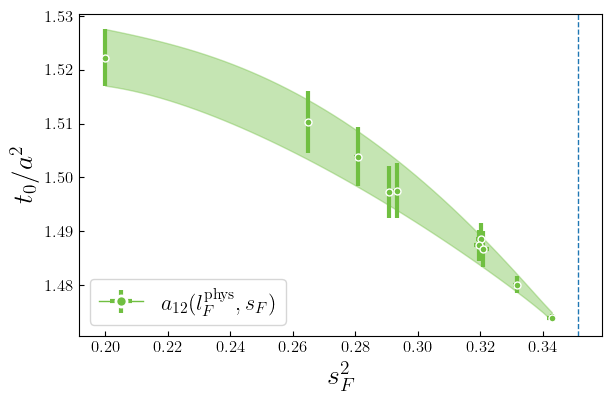

In [ ]:
fit_manager.plot_interpolation('a12', param='s', observable='t0')